# Day 2-3: Exploratory Data Analysis for Scientists
## 1 Importing Data and A Tiny Analysis <a id='topofdoc'></a>

[Today's Goal](#todaysgoal) : The goal of this notebook is to introduce you to importing and analyzing data using a jupyter notebook with the programming language R. The other goal is show how carbon pollution is causing ocean acidification.  

More info about running jupyter notebooks is found at the [bottom of this notebook](#INFOjupyternotebook). To make the notebook easy to execute, longer text information is provided through hyperlinks.   

The essential info you need to know: To run code in an input box or cell, place your cursor in the box and push SHIFT+ENTER or click the Run button.


### 1.1 [Motivation](#motivation) to study the 1st data set:


Your first data set is from Hawaii, where scientists measured the pH and atmospheric CO$_2$ concentration over many years. 

We will use this data to explore the rise in CO$_2$ and ocean acidification.

Together we'll watch a interview with Dr. Kaho Tisthammer, a previous post-doc at SFSU, who will tell about her research on the effect of pollutants on corals and the impacts of climate change on the oceans. Links to rewatch all the video we will view are on the resources page.

<img src="../../images/eda/coral-reefs-NatGeo.jpg" width=300 height=300 />
https://www.nationalgeographic.com/science/2020/06/scientists-work-to-save-coral-reefs-climate-change-marine-parks/

### 1.2 Data Provenance (citations) and chemistry background: 

We will use a freely available [dataset](#epa) provided from the Environmental Protection Agency (EPA). The data gives the pH and CO$_2$ concentration in the ocean near Hawaii, the Canaray Islands, and Bermuda. Here is an example of the first 10 rows of data from Hawaii, opened with Excel and example plots given from the EPA's website.

What are some trends you see from the plots?

<img src="../../images/eda/Excel_data.png" width=200 height=200 />
<img src="../../images/eda/EDA-planning.png" width=500 height=500 />

We are eventually going to plot CO$_2$ versus pH, to examine the correlation. To start, we'll reproduce the lower left plot, pCO$_2$ versus time for Hawaii.

Of course, if you are familiar with Excel, you could make the plot with Excel. But we're here to learn how to write code to analyze data!

### 1.3 Importing data:  we need to "get" the data to analyze it

We did a little bit of data cleaning when we downloaded the data from the EPA's website. You'll learn about data cleaning later in this course. When you download our cleaned data, the only thing you'll need to do is give each column a title.

Now we have a video describing data importation to watch. You can [read](#importdata) about it at the bottom of the document, too!

INSTRUCTIONS: Download data, named Hawaii-ocean-acidity.csv, and move it to your Data directory.  If you name the file something different or put it in a different folder, change the file name (filename) in the cell below.

INSTRUCTIONS: Push SHIFT+ENTER in the cell below to save the variable name.

In [3]:
filename = "../Data/Hawaii-ocean-acidity.csv"

From now on we will not explicitly tell you to push SHIFT+ENTER to run code.

The general scheme needed to import data in a script is: 1) identify the structure of the data or set the structure, if you made the data. 2) Then identify the location of the data - its path on your computer. 3) Next, open that file in the script (generate a pointer to that file's location). 4) Read each line of the file or read it all at once. 5) Finally, save the data into appropriately named variables or a data frame
    
In R, we can do 4 and 5 in one line of code. 

ClimateData will be the name of the data frame where we store the data. 

read.csv is the function we use to read the data. 

filename is the location of the data (as we set in the previous cell). 

We also include the following two arguments: 

header = FALSE
col.names  = c("Date","pH","pCO2") 

to set the names of the columns in the data frame. 

In [4]:
ClimateData <- read.csv(filename, header = FALSE, col.names  = c("Date","pH","pCO2"))

#### Viewing Dataframes

There are different ways to look at what is stored in a data frame. 
It is always smart to look at the data frame you've just created to make sure it's contents are what you expect. 
Here we use two functions, str() and head() to do just that. 

In [5]:
str(ClimateData)

'data.frame':	261 obs. of  3 variables:
 $ Date: num  1989 1989 1989 1989 1989 ...
 $ pH  : num  8.11 8.11 8.12 8.13 8.12 ...
 $ pCO2: num  331 331 324 311 318 ...


In [6]:
head(ClimateData)

Date,pH,pCO2
1988.833,8.1097,330.9
1988.921,8.1092,330.6
1989.022,8.1168,324.3
1989.156,8.1316,310.9
1989.236,8.1218,317.7
1989.378,8.1158,326.2


The head command prints a dataframe like a spreadsheet!

### 1.4 Introduction to Plotting

There are a number of things that we can do with this data!

First, let's see if the CO$_2$ concentration rose from 1990 to 2015. Combustion of fossil fuels has lead to rising CO$_2$ concentrations in the atmosphere and dissolved in the ocean, which we can look for in this data. The fraction of dissolved CO$_2$ in the ocean is given a partial pressure given in micro-Atmospheres. Recall, ambient pressure is 1 Atm. 

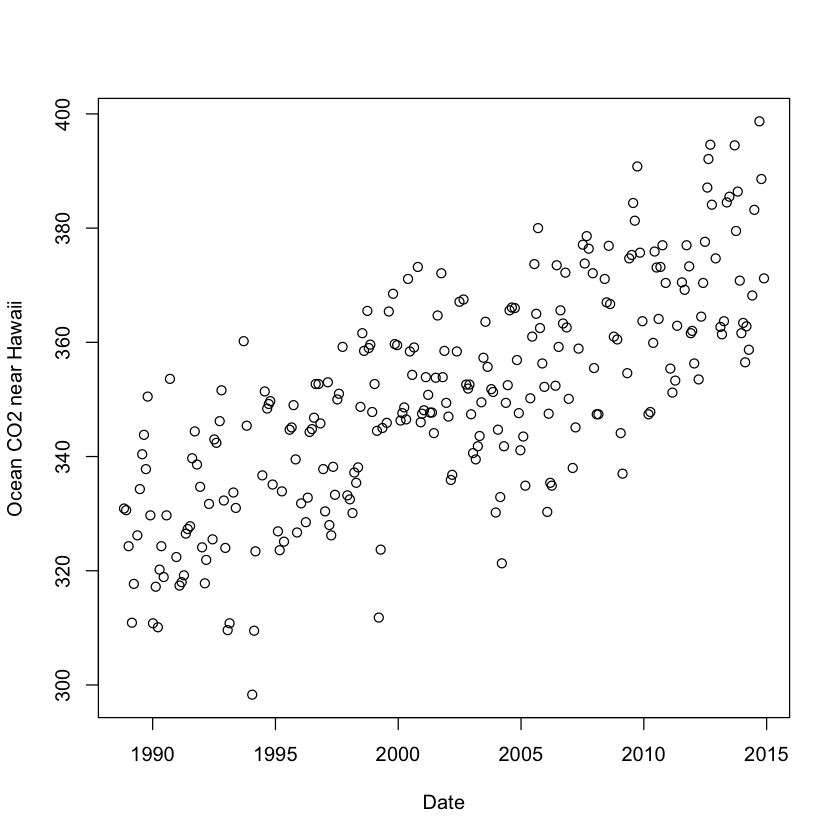

In [7]:
plot(ClimateData$Date,ClimateData$pCO2, xlab="Date", ylab="Ocean CO2 near Hawaii")

What do you think? Did the CO$_2$ partial pressure rise significantly?

### 1.4.1 Analyzing data with scripts - Motivation

The data that we plotted does not look like the EPA plots.  We'll explore how to modify our plot in a second.

The function that I used to plot pCO$_2$ over time looks complicated, especially if you have never plotted in R before. 

Let's think about the input to the plotting function to generate the above plot! Note, the original data set contained three columns: date, pH, and pCO2.

Thus, I needed to select the date and pCO2 columns. I also defined the label for the x and y axes. 

In [ ]:
picture of someone thinking about the data?

Before learning to code, it's likely you would have generated the plot and anazlyed the data in an "amateur" way, in other words - manually. Many scientists tend to manually analyze their data using Office-like software tools. The most popular tools are Excel, Google Sheets, Mac's Numbers and Libre Office, for example. (I think we can put the other information this section of Gaston's book, like on WYSIWYG as a separate reading assignment.) 

You are learning powerful skills to use the text file of the data, write code, and work with a dynamic document (jupyter notebook) to analyze data.

We're sure you'll use the manual tools sometimes, but soon you can use your coding skills to be more effecient and creative. 

Once we have a small R script that will plot the date vs. pCO$_2$, we can easily change it to plot any of the columns against each other. We can also import the data from Bermuda and the Canary Islands, to compare all the locations.

### 1.5 Exploring plotting in R

It's probably better to use lines for the above plot, to show how the pH goes up and down. 

We use the named argument type = "l" for this. 

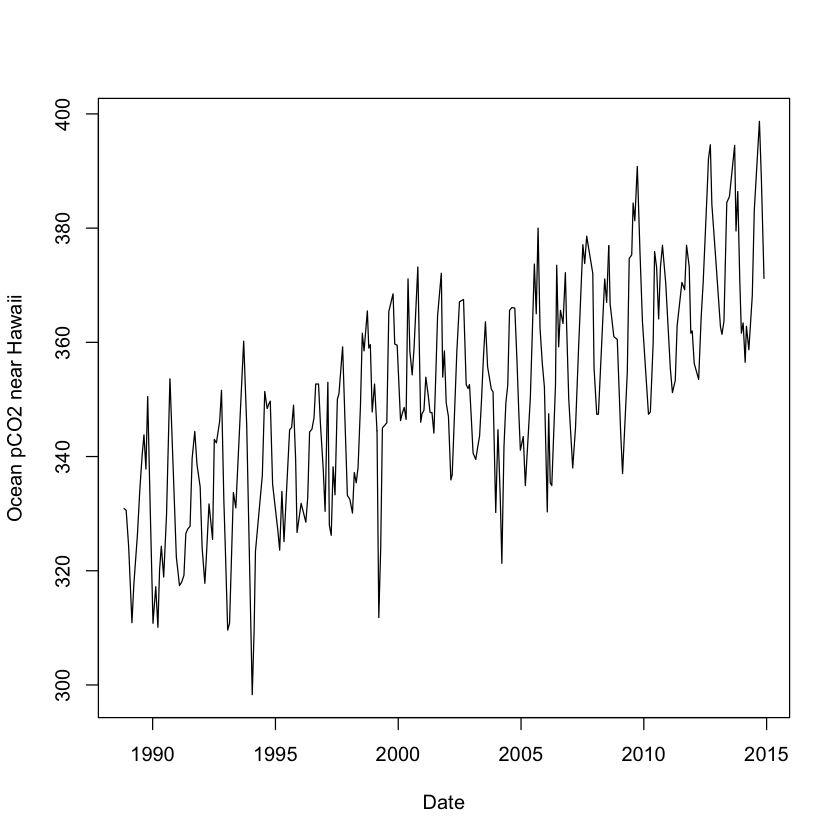

In [14]:
plot(ClimateData$Date,ClimateData$pCO2, type="l", xlab="Date", ylab="Ocean pCO2 near Hawaii", pch=10)

INSTRUCTIONS: Try out "p","b", "n" , "o" in the cell below. Keep notes of how the plot changes. 

See https://www.dummies.com/programming/r/how-to-create-different-plot-types-in-r/)

The standard plotting function in R is plot(). plot() takes the x values and y values as the first and second argument. Later arguments are named, such as xlab (label for the x axis), ylab (label for the y axis). There are many possible named arguments and plot() can make many, many different kinds of figures. The other plotting package is ggplot2, which we will learn later!

If you are interested, have a look at this paper https://onlinelibrary.wiley.com/doi/pdf/10.1111/jeb.12496. Professor Pleuni Pennings made all the figures in this paper with the plot() function. 


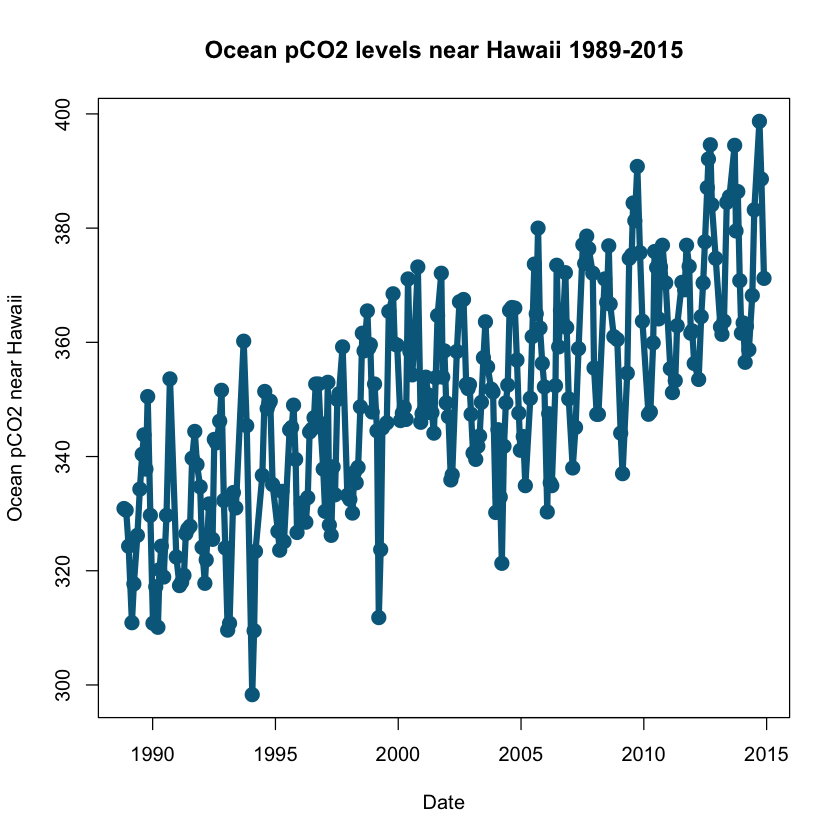

In [16]:
#Let's add a title, and thicken lines, and make the lines blue to make the plot look nicer. 
plot(ClimateData$Date,ClimateData$pCO2, type="o", xlab="Date", ylab="Ocean pCO2 near Hawaii", 
     main="Ocean pCO2 levels near Hawaii 1989-2015", col="deepskyblue4",lwd=5)

### 1.5 Exploring data statistics in R

Let's find out some information about the data.

__To start, what is the range of years over which the data was taken?__

The data in the "Date" column can be accessed using the dollar sign and the column name: ClimateData$Date

We will use the summary() function to look at the range. 

In [5]:
#look at min and max using summary
summary(ClimateData$Date)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1989    1996    2002    2002    2008    2015 

The minimum and maximum of the data are determined using minimum and maximum functions, too.

In [6]:
print(paste("Mean Date ", mean(ClimateData$Date)))
print(paste("Minimum Date ", min(ClimateData$Date)))
print(paste("Maximum Date ", max(ClimateData$Date)))
print(paste("Standard Deviation Date ", sd(ClimateData$Date)))

[1] "Mean Date  2001.96441003448"
[1] "Minimum Date  1988.833333"
[1] "Maximum Date  2014.893151"
[1] "Standard Deviation Date  7.43378655535459"


Note that the day and month are represented by the decimal - conceptually as a fraction of the year. Consider how you could represent January 2, 1988 (which is not included in the data set). 

__Which date was the first measurement taken?__

In [8]:
1988+2./365.

[1] 1988.005

R also has functions to compute the average and standard deviation of the data. I computed them and the min and max for the pH data below. 

In [9]:
summary(ClimateData$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  8.042   8.079   8.089   8.091   8.104   8.151 

In [10]:
print(paste("Standard Deviation pH ", sd(ClimateData$pH)))

[1] "Standard Deviation pH  0.0192785952903471"


### 1.6 The ocean is acidifying - its pH is getting lower!

Now we'll watch a video that will describe the relationship between atmosphere CO$_2$ concentration to pH in the oceans.

Recall from above, standard deviation in the pH data is 0.019. 

As an initial guess, we might think that any values in the range of 8.07 to 8.11 are close to the mean - within one standard deviaition. You can see in the "summary" output that the 1st and 3rd Quartiles give a similar range.  


In the cell below, calculate the mean, maximum value, minimum value, and standard deviation of the CO$_2$ concentration data. 

In [13]:
summary(ClimateData$pCO2)
print(paste("Standard Deviation pCO2 ", sd(ClimateData$pCO2)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.3   336.8   350.1   350.4   363.4   398.7 

[1] "Standard Deviation pCO2  19.0464372568209"


Note the minimum and maximum pH values are larger than one standard deviation of the mean. But this analysis hides a lot of interesting structure within the data, which we can better observe by plotting.

#### 1.6.1 Plotting pH vs. CO2

So far, we have plotted CO2 versus time. Insert a cell below and plot the pH versus time.

Now that we can see the data, calculating standard deviation of the entire data set does not make a lot of sense.

It would be better to determine the standard deviation of the average pH during a year and ALSO the standard deviation during a given year. We may do this next week.

We can ask why the pH varies so much during the year. Recall that the pH and CO2 seemed to be inversely correlated. In both data sets, there is a lot of noise.

What is the cause of the periodic fluctuations in the data? Discuss! 

We see that as the pCO$_2$ increases, the pH decreases. There is a cyclical variation in the pCO$_2$ over a year, but it has risen during the last 30 years. We also know that the pCO$_2$ has risen steeply since the industrial revolution (slides). 

Do you think there will still be the yearly fluctuations if we plot pH versus pCO2? Make a prediction and discuss.

INSTUCTIONS: Now make a scatter plot! Plot the pH versus pCO$_2$:

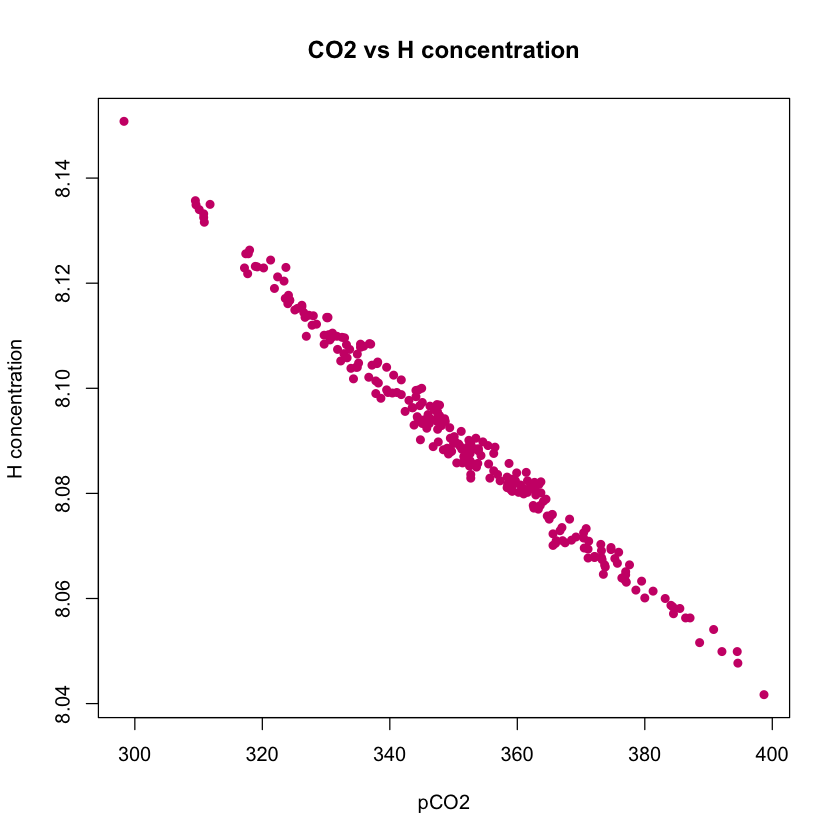

In [18]:
#Here we plot points, hence type = "p". pch = 16 makes them solid.
plot(ClimateData$pCO2,ClimateData$pH, xlab="pCO2", ylab="H concentration", type="p",pch=16,
     main="CO2 vs H concentration", col="deeppink3",lwd=3)


Look at your plot of pH versus pCO$_2$. Do you think the relationship is linear? 

Next time we'll look at the H$^+$ concentration versus pCO$_2$.

On day three, you will learn how to organize data in an excel spreadsheet in the best way for doing analyses with scripting. You'll organize the CO$_2$ and pH data from Bermuda and the Canary Islands, in addition to the Hawaii data. Then we'll do some more analyses, like linear regression.

## Summaries and videos from class are included below. 

Hyperlinks in the jupyter notebook connect the code with the information below. 

[Top of the Document](#topofdoc)

#### Information on today's goal:  <a id='todaysgoal'></a> 

If we have a small amount of data, we often enter it into an Excel spreadsheet and perform analysis and plotting within that spreadsheet. However, this method is not sustainable for larger datasets and does not lead to reproducible analyses. As data sets become larger and analyses more complex, writing code to analyze data becomes necessary, as you will learn in this course called Exploratory Data Analysis for Scientists.

<a id='INFOjupyternotebook'></a> 
#### Information on jupyter notebooks:



This may be the first "Jupyter Notebook" that you have used. Jupyter Notebooks are a great way to analyze data, providing a document where scientists can view data, write code to analyze their data, and visualize their data or analyses. It is also a great way to comment and annotate code.

At the beginning of most notebooks, modules should be uploaded, or the modules can be uploaded with the section of code that depends on them. 

In a jupyter notebook, pieces of code are entered via cells. One can run all the cells from the top, or run individual cells, one at a time. Variables in the cells are stored in memory.

<a id='motivation'></a>
#### Motivation to study climate data

Global warming due to our atmospheric pollution is one of the most urgent crisis facing us today. Increased CO$_2$ in the atmosphere and rising temperatures have a cascading effect that will effect all life and ecosystems. Biologists, chemists, and physicists can all do their part to study climate change and find solutions to the problems caused by the changing climate. Scientists, especially, should be familiar with the data, whether or not our particular discipline focuses on climate change. We need to be able to talk to our friends and family about the global climate crisis, to build political willpower to enact solutions.

One effect of increased CO$_2$ concentration in the atmosphere is increased uptake of CO$_2$ into the oceans. Higher concentrations of CO$_2$ cause acidification of the oceans and a lowering of the ocean's pH. The lower pH affects many animals and plants, especially coral reefs. We will start by looking at how much the concentration of CO$_2$ and pH has changed.

<a id='tisthammer'></a>
If you want to rewatch the video at home, push SHIFT+ENTER in the input box below. 

<a id='epa'></a>
#### Data Provinance 

The Environmental Protection Agency (EPA) has collated the data and make them available to the public from the following website:
    
    https://www.epa.gov/climate-indicators/climate-change-indicators-ocean-acidity
    
The data for each of these locations consist of a date, a ocean pH measurement, and the partial pressure of CO$_2$ in partial atmospheres. We downloaded the data on January 15th 2020. 

It is important to cite and record where you download or recieve data from!

#### Chemistry background


Please see this
<a href="https://chem.libretexts.org/Bookshelves/Introductory_Chemistry/Book%3A_Chemistry_for_Allied_Health_(Soult)/09%3A_Properties_of_Solutions/9.6%3A_The_pH_Concept">link</a> to read more about pH or this <a href="https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_Chemistry_-_The_Central_Science_(Brown_et_al.)/10%3A_Gases/10.6%3A_Gas_Mixtures_and_Partial_Pressures">link</a> to read about partial atmospheres. 

Press SHIFT+ENTER in the cell below to watch the video on pH and CO$_2$.


In [ ]:
HTML('<iframe width="560" height="315" src="https://www.dropbox.com/s/yqa1i1oyzae8qfz/pCO2_pH_lecture.mp4?raw=1" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; autoplay = False ; picture-in-picture;  type="video/mp4"" allowfullscreen></iframe>')

<a id='importdata'></a>
#### Importing data with R

We edited the data that was downloaded from the internet so that it is easier to import. In future lessons, you will learn more about how to format and organize data according to best practices. For this lesson, we'll just import the data from Hawaii that was already "cleaned" for you. The downloaded data have a structure, which is important to identify before importing. 

One can open data in a number of ways, to identify the structure, if it is not known. To save a step, we give you the structure of the Hawaii-ocean-acitivity.csv file here:

The csv file has three columns. These three columns contain the date, pH, and pCO$_2$ from Hawaii. There is no header row. 

Our data will be imported from a csv file (comma separated variables). R has a function, called read.csv to help import csv files, so we'll load (import) the data using that function. The data will then be stored in a data structure that's called a "data frame." Data frames are very useful data structures in R (and Python). Here's a link to read more about data frames: https://www.tutorialspoint.com/r/r_data_frames.htm. This tutorial begins with: "A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable and each row contains one set of values from each column."

In order to import data, we need to tell our script where to find the data on our computer. Your data should be stored in a folder that is separate from your analyses and output. 

Create a folder (directory) named Data each time you start a project and keep your raw data there. 

### If you have time, work ahead to next lecture

#### Chemistry background on pH and acidity.

Do you think that there is a more linear relationship between pH and pCO$_2$ or the concentration of H$^+$? Discuss with your neighbor and consider the video showing what happens when CO$_2$ reacts with water. 

We can determine this relationships or the correlation between the data using more statistical analysis.

First, let's convert the pH data into $[H^+]$ concentration using the following equations:

$$pH = -log_{10}([H^+])$$

$$[H^+] = 10^{(-pH)}$$

In [ ]:
ClimateData$Hconcentration = 10**(-1*ClimateData$pH)

In R, to compute $x^y$, two stars are used to indicate the exponent, as $x**y$. We can add this piece of information as a new column in the data frame. Let's call the new column Hconcentration. Creating a new column, based on info from an existing column is easy in R. 

In [ ]:
plot(ClimateData$pCO2,ClimateData$Hconcentration, xlab="pCO2", ylab="H concentration", type="p",pch=16,
     main="CO2 vs H concentration", col="deeppink3",lwd=3)

Because I expect there to be a linear relationship between pCO$_2$ and concentration of H$^+$, I plotted $[H^+]$ rather than the pH against the pCO$_2$.

How does the plot of pH versus pCO$_2$ compare to the plot of $[H^+]$ versus pCO$_2$?